<a href="https://colab.research.google.com/github/giovannichedide/pairtrading/blob/main/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RSI (Relative Strenght Index) - IFR**

O Índice de Força Relativa (IFR) é um oscilador de momentum que mede a velocidade e a mudança dos movimentos de preços. Geralmente, o IFR é considerado superavaliado quando está acima de 70 e subavaliado quando abaixo de 30.

A escala de variação do IFR é constante entre 0 a 100. De acordo com o nível do índice, é possível indicar se existe uma zona de sobrecompra, com ações supervalorizadas, ou de sobrevenda, em casos de ações subvalorizadas.

In [8]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [9]:
pip install --upgrade --no-cache-dir git+https://github.com/baselsm/tvdatafeed.git

  Cloning https://github.com/baselsm/tvdatafeed.git to /tmp/pip-req-build-ihwn280k
  Running command git clone --filter=blob:none --quiet https://github.com/baselsm/tvdatafeed.git /tmp/pip-req-build-ihwn280k
  Resolved https://github.com/baselsm/tvdatafeed.git to commit cfc26940b273641116effa1b7c12982191b5a941
  Preparing metadata (setup.py) ... done


In [10]:
from tvDatafeed import TvDatafeed, Interval

In [11]:
tv = TvDatafeed()

In [12]:
df = tv.get_hist(symbol='PETR4',exchange = 'BMFBOVESPA', interval=Interval.in_5_minute,n_bars=5000)

In [13]:
df

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-07-26 13:55:00,BMFBOVESPA:PETR4,30.038363,30.067274,29.951631,29.970904,444640.0
2023-07-26 14:00:00,BMFBOVESPA:PETR4,29.970904,29.999815,29.826350,29.845624,840098.0
2023-07-26 14:05:00,BMFBOVESPA:PETR4,29.835987,29.874535,29.729981,29.749255,1390479.0
2023-07-26 14:10:00,BMFBOVESPA:PETR4,29.749255,29.758892,29.556516,29.575790,1844566.0
2023-07-26 14:15:00,BMFBOVESPA:PETR4,29.566153,29.662522,29.517968,29.633611,715161.0
...,...,...,...,...,...,...
2023-10-13 20:35:00,BMFBOVESPA:PETR4,36.220000,36.240000,36.220000,36.230000,40100.0
2023-10-13 20:40:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.240000,9000.0
2023-10-13 20:45:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.250000,7300.0


In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close)])

fig.update_xaxes(rangebreaks=[dict(bounds=[18,10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

In [15]:
periods = 14

close_ret = df['close'] / df['close'].shift(1) - 1

In [16]:
close_ret

datetime
2023-07-26 13:55:00         NaN
2023-07-26 14:00:00   -0.004180
2023-07-26 14:05:00   -0.003229
2023-07-26 14:10:00   -0.005831
2023-07-26 14:15:00    0.001955
                         ...   
2023-10-13 20:35:00    0.000000
2023-10-13 20:40:00    0.000276
2023-10-13 20:45:00    0.000276
2023-10-13 20:50:00   -0.000552
2023-10-13 20:55:00    0.000000
Name: close, Length: 5000, dtype: float64

In [17]:
up = close_ret.clip(lower=0)
up

datetime
2023-07-26 13:55:00         NaN
2023-07-26 14:00:00    0.000000
2023-07-26 14:05:00    0.000000
2023-07-26 14:10:00    0.000000
2023-07-26 14:15:00    0.001955
                         ...   
2023-10-13 20:35:00    0.000000
2023-10-13 20:40:00    0.000276
2023-10-13 20:45:00    0.000276
2023-10-13 20:50:00    0.000000
2023-10-13 20:55:00    0.000000
Name: close, Length: 5000, dtype: float64

In [18]:
ma_up = up.rolling(window=periods).mean()
ma_up

datetime
2023-07-26 13:55:00         NaN
2023-07-26 14:00:00         NaN
2023-07-26 14:05:00         NaN
2023-07-26 14:10:00         NaN
2023-07-26 14:15:00         NaN
                         ...   
2023-10-13 20:35:00    0.000375
2023-10-13 20:40:00    0.000395
2023-10-13 20:45:00    0.000395
2023-10-13 20:50:00    0.000395
2023-10-13 20:55:00    0.000395
Name: close, Length: 5000, dtype: float64

In [19]:
down = -1 * close_ret.clip(upper=0)
down

datetime
2023-07-26 13:55:00         NaN
2023-07-26 14:00:00    0.004180
2023-07-26 14:05:00    0.003229
2023-07-26 14:10:00    0.005831
2023-07-26 14:15:00   -0.000000
                         ...   
2023-10-13 20:35:00   -0.000000
2023-10-13 20:40:00   -0.000000
2023-10-13 20:45:00   -0.000000
2023-10-13 20:50:00    0.000552
2023-10-13 20:55:00   -0.000000
Name: close, Length: 5000, dtype: float64

In [20]:
ma_down = down.rolling(window=periods).mean()
ma_down

datetime
2023-07-26 13:55:00         NaN
2023-07-26 14:00:00         NaN
2023-07-26 14:05:00         NaN
2023-07-26 14:10:00         NaN
2023-07-26 14:15:00         NaN
                         ...   
2023-10-13 20:35:00    0.000493
2023-10-13 20:40:00    0.000453
2023-10-13 20:45:00    0.000453
2023-10-13 20:50:00    0.000473
2023-10-13 20:55:00    0.000394
Name: close, Length: 5000, dtype: float64

In [21]:
rs = ma_up / ma_down

In [22]:
df['rsi'] = 100 - (100 / (1 + rs))

In [23]:
df

,symbol,open,high,low,close,volume,rsi
datetime,,,,,,,
2023-07-26 13:55:00,BMFBOVESPA:PETR4,30.038363,30.067274,29.951631,29.970904,444640.0,NaN
2023-07-26 14:00:00,BMFBOVESPA:PETR4,29.970904,29.999815,29.826350,29.845624,840098.0,NaN
2023-07-26 14:05:00,BMFBOVESPA:PETR4,29.835987,29.874535,29.729981,29.749255,1390479.0,NaN
2023-07-26 14:10:00,BMFBOVESPA:PETR4,29.749255,29.758892,29.556516,29.575790,1844566.0,NaN
2023-07-26 14:15:00,BMFBOVESPA:PETR4,29.566153,29.662522,29.517968,29.633611,715161.0,NaN
...,...,...,...,...,...,...,...
2023-10-13 20:35:00,BMFBOVESPA:PETR4,36.220000,36.240000,36.220000,36.230000,40100.0,43.229247
2023-10-13 20:40:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.240000,9000.0,46.555613
2023-10-13 20:45:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.250000,7300.0,46.556640


In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, row_heights=[0.7 , 0.3], vertical_spacing=0.02, shared_xaxes=True)

fig.add_trace(go.Candlestick(x=df.index,
                                     open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close))

fig.add_trace(go.Scatter(x=df.index,
                      y=df['rsi']), row=2,col=1)

fig.update_xaxes(rangebreaks=[dict(bounds=[18,10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

In [25]:
df.tail(20)

,symbol,open,high,low,close,volume,rsi
datetime,,,,,,,
2023-10-13 18:50:00,BMFBOVESPA:PETR4,36.27,36.29,36.23,36.27,614800.0,57.161563
2023-10-13 18:55:00,BMFBOVESPA:PETR4,36.28,36.30,36.26,36.29,768700.0,64.724176
2023-10-13 19:00:00,BMFBOVESPA:PETR4,36.28,36.30,36.27,36.27,335300.0,56.268706
2023-10-13 19:05:00,BMFBOVESPA:PETR4,36.28,36.29,36.24,36.28,545000.0,67.881252
2023-10-13 19:10:00,BMFBOVESPA:PETR4,36.27,36.28,36.25,36.27,407800.0,64.309857
2023-10-13 19:15:00,BMFBOVESPA:PETR4,36.26,36.28,36.23,36.23,1046000.0,50.017241
2023-10-13 19:20:00,BMFBOVESPA:PETR4,36.23,36.28,36.23,36.26,729900.0,48.164495
2023-10-13 19:25:00,BMFBOVESPA:PETR4,36.25,36.26,36.20,36.22,816500.0,44.841954
2023-10-13 19:30:00,BMFBOVESPA:PETR4,36.23,36.25,36.09,36.18,2122000.0,35.491275


In [26]:
# Fazendo o backtesting da estratégia RSI

In [27]:
def get_rsi(window):

  close_ret = df['close'] / df['close'].shift(1) - 1

  up = close_ret.clip(lower=0)
  down = -1 * close_ret.clip(upper=0)

  ma_up = up.rolling(window=periods).mean()
  ma_down = down.rolling(window=periods).mean()

  rs = ma_up / ma_down
  rsi = 100 - (100 / (1 + rs))

  return rsi

In [28]:
window = 14

get_rsi(window)

datetime
2023-07-26 13:55:00          NaN
2023-07-26 14:00:00          NaN
2023-07-26 14:05:00          NaN
2023-07-26 14:10:00          NaN
2023-07-26 14:15:00          NaN
                         ...    
2023-10-13 20:35:00    43.229247
2023-10-13 20:40:00    46.555613
2023-10-13 20:45:00    46.556640
2023-10-13 20:50:00    45.498651
2023-10-13 20:55:00    50.041077
Name: close, Length: 5000, dtype: float64

In [29]:
df['rsi'] = get_rsi(window)

In [30]:
df

,symbol,open,high,low,close,volume,rsi
datetime,,,,,,,
2023-07-26 13:55:00,BMFBOVESPA:PETR4,30.038363,30.067274,29.951631,29.970904,444640.0,NaN
2023-07-26 14:00:00,BMFBOVESPA:PETR4,29.970904,29.999815,29.826350,29.845624,840098.0,NaN
2023-07-26 14:05:00,BMFBOVESPA:PETR4,29.835987,29.874535,29.729981,29.749255,1390479.0,NaN
2023-07-26 14:10:00,BMFBOVESPA:PETR4,29.749255,29.758892,29.556516,29.575790,1844566.0,NaN
2023-07-26 14:15:00,BMFBOVESPA:PETR4,29.566153,29.662522,29.517968,29.633611,715161.0,NaN
...,...,...,...,...,...,...,...
2023-10-13 20:35:00,BMFBOVESPA:PETR4,36.220000,36.240000,36.220000,36.230000,40100.0,43.229247
2023-10-13 20:40:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.240000,9000.0,46.555613
2023-10-13 20:45:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.250000,7300.0,46.556640


In [31]:
up_exit = 70
down_entry = 30
bet_size = 100

# Estratégia: comprar quando o RSI estiver abaixo de 30 e vender
# quando estiver acima de 70

list_trades = []
t = 0

for idx, row in df.iterrows():
  if row['rsi'] <= down_entry and t == 0:
    list_trades += [{'price': row['close'], 'time': idx, 'kind':'buy', 'quantity': bet_size}]
    # Faz a operação de soma de listas e junta tudo atualizando no list_trades
    t = 1

  elif row['rsi'] >= up_exit and t == 1:
    list_trades += [{'price': row['close'], 'time': idx, 'kind':'sell', 'quantity': -bet_size}]
    # Faz a operação de soma de listas e junta tudo atualizando no list_trades
    t = 0

list_trades

[{'price': 29.6047,
  'time': Timestamp('2023-07-26 15:05:00'),
  'kind': 'buy',
  'quantity': 100},
 {'price': 29.70107,
  'time': Timestamp('2023-07-26 16:45:00'),
  'kind': 'sell',
  'quantity': -100},
 {'price': 29.460146,
  'time': Timestamp('2023-07-27 13:15:00'),
  'kind': 'buy',
  'quantity': 100},
 {'price': 28.727738,
  'time': Timestamp('2023-07-28 14:05:00'),
  'kind': 'sell',
  'quantity': -100},
 {'price': 28.525362,
  'time': Timestamp('2023-07-28 16:10:00'),
  'kind': 'buy',
  'quantity': 100},
 {'price': 29.546879,
  'time': Timestamp('2023-07-31 13:05:00'),
  'kind': 'sell',
  'quantity': -100},
 {'price': 29.739618,
  'time': Timestamp('2023-07-31 16:40:00'),
  'kind': 'buy',
  'quantity': 100},
 {'price': 29.855261,
  'time': Timestamp('2023-07-31 17:00:00'),
  'kind': 'sell',
  'quantity': -100},
 {'price': 29.643248,
  'time': Timestamp('2023-08-01 13:05:00'),
  'kind': 'buy',
  'quantity': 100},
 {'price': 29.161401,
  'time': Timestamp('2023-08-01 17:15:00'),
  

In [32]:
# list_trades = lista de dicionários com informações de compra e venda
pd.DataFrame(list_trades)

,price,time,kind,quantity
0,29.604700,2023-07-26 15:05:00,buy,100
1,29.701070,2023-07-26 16:45:00,sell,-100
2,29.460146,2023-07-27 13:15:00,buy,100
3,28.727738,2023-07-28 14:05:00,sell,-100
4,28.525362,2023-07-28 16:10:00,buy,100
...,...,...,...,...
105,34.980000,2023-10-09 17:35:00,sell,-100
106,34.820000,2023-10-09 19:30:00,buy,100
107,35.130000,2023-10-10 14:10:00,sell,-100
108,35.130000,2023-10-11 13:00:00,buy,100


In [33]:
# O row vai sendo igual a uma series criada a partir de uma linha diferente
# a cada momento de iteração no df
row

symbol    BMFBOVESPA:PETR4
open                 36.22
high                 36.23
low                  36.21
close                36.23
volume             32900.0
rsi              50.041077
Name: 2023-10-13 20:55:00, dtype: object

In [34]:
# O idx vai sendo um índice diferente a cada momento
# de iteração no df
idx

Timestamp('2023-10-13 20:55:00')

In [35]:
df_trades_raw = pd.DataFrame(list_trades)
df_trades_raw.set_index('time', inplace=True)

In [36]:
df_trades_raw

,price,kind,quantity
time,,,
2023-07-26 15:05:00,29.604700,buy,100
2023-07-26 16:45:00,29.701070,sell,-100
2023-07-27 13:15:00,29.460146,buy,100
2023-07-28 14:05:00,28.727738,sell,-100
2023-07-28 16:10:00,28.525362,buy,100
...,...,...,...
2023-10-09 17:35:00,34.980000,sell,-100
2023-10-09 19:30:00,34.820000,buy,100
2023-10-10 14:10:00,35.130000,sell,-100


In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_buys = df_trades_raw[df_trades_raw['kind'] == 'buy']
df_sells = df_trades_raw[df_trades_raw['kind'] == 'sell']

fig = make_subplots(rows=2, cols=1, row_heights=[0.7 , 0.3], vertical_spacing=0.02, shared_xaxes=True)

fig.add_trace(go.Candlestick(x=df.index,
                                     open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close), row=1, col=1)


fig.add_trace(go.Scatter(x=df_buys.index, y=df_buys['price'], marker_color='#11dd11', marker_size=15,
                         mode='markers', marker_symbol='triangle-up'), row=1,col=1)
fig.add_trace(go.Scatter(x=df_sells.index, y=df_sells['price'], marker_color='#dd2222', marker_size=15,
                         mode='markers', marker_symbol='triangle-down'), row=1,col=1)

fig.add_trace(go.Scatter(x=df.index,
                      y=df['rsi']), row=2,col=1)

fig.update_xaxes(rangebreaks=[dict(bounds=[18,10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

#**Marcação a mercado**



In [38]:
df_trades_raw

,price,kind,quantity
time,,,
2023-07-26 15:05:00,29.604700,buy,100
2023-07-26 16:45:00,29.701070,sell,-100
2023-07-27 13:15:00,29.460146,buy,100
2023-07-28 14:05:00,28.727738,sell,-100
2023-07-28 16:10:00,28.525362,buy,100
...,...,...,...
2023-10-09 17:35:00,34.980000,sell,-100
2023-10-09 19:30:00,34.820000,buy,100
2023-10-10 14:10:00,35.130000,sell,-100


In [39]:
df_trades = df_trades_raw.join(df['close'], how='outer')
df_trades

,price,kind,quantity,close
2023-07-26 13:55:00,NaN,NaN,NaN,29.970904
2023-07-26 14:00:00,NaN,NaN,NaN,29.845624
2023-07-26 14:05:00,NaN,NaN,NaN,29.749255
2023-07-26 14:10:00,NaN,NaN,NaN,29.575790
2023-07-26 14:15:00,NaN,NaN,NaN,29.633611
...,...,...,...,...
2023-10-13 20:35:00,NaN,NaN,NaN,36.230000
2023-10-13 20:40:00,NaN,NaN,NaN,36.240000
2023-10-13 20:45:00,NaN,NaN,NaN,36.250000
2023-10-13 20:50:00,NaN,NaN,NaN,36.230000


In [40]:
import numpy as np

In [41]:
df_trades['position'] = df_trades['quantity'].shift(1).fillna(0).cumsum()

In [42]:
df_trades['position'] > 0

2023-07-26 13:55:00    False
2023-07-26 14:00:00    False
2023-07-26 14:05:00    False
2023-07-26 14:10:00    False
2023-07-26 14:15:00    False
                       ...  
2023-10-13 20:35:00    False
2023-10-13 20:40:00    False
2023-10-13 20:45:00    False
2023-10-13 20:50:00    False
2023-10-13 20:55:00    False
Name: position, Length: 5000, dtype: bool

In [43]:
df_trades[df_trades['position'] > 0].head(50)

,price,kind,quantity,close,position
2023-07-26 15:10:00,NaN,NaN,NaN,29.585427,100.0
2023-07-26 15:15:00,NaN,NaN,NaN,29.604700,100.0
2023-07-26 15:20:00,NaN,NaN,NaN,29.604700,100.0
2023-07-26 15:25:00,NaN,NaN,NaN,29.595063,100.0
2023-07-26 15:30:00,NaN,NaN,NaN,29.575790,100.0
2023-07-26 15:35:00,NaN,NaN,NaN,29.556516,100.0
2023-07-26 15:40:00,NaN,NaN,NaN,29.546879,100.0
2023-07-26 15:45:00,NaN,NaN,NaN,29.652885,100.0
2023-07-26 15:50:00,NaN,NaN,NaN,29.623974,100.0
2023-07-26 15:55:00,NaN,NaN,NaN,29.595063,100.0


In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_buys = df_trades_raw[df_trades_raw['kind'] == 'buy']
df_sells = df_trades_raw[df_trades_raw['kind'] == 'sell']

fig = make_subplots(rows=3, cols=1, row_heights=[0.6 , 0.2, 0.2], vertical_spacing=0.02, shared_xaxes=True)

fig.add_trace(go.Candlestick(x=df.index,
                                     open=df.open,
                                     high=df.high,
                                     low=df.low,
                                     close=df.close), row=1, col=1)


fig.add_trace(go.Scatter(x=df_buys.index, y=df_buys['price'], marker_color='#11dd11', marker_size=15,
                         mode='markers', marker_symbol='triangle-up'), row=1,col=1)
fig.add_trace(go.Scatter(x=df_sells.index, y=df_sells['price'], marker_color='#dd2222', marker_size=15,
                         mode='markers', marker_symbol='triangle-down'), row=1,col=1)

fig.add_trace(go.Scatter(x=df_trades.index,
                      y=df_trades['position']), row=2,col=1)

fig.add_trace(go.Scatter(x=df.index,
                      y=df['rsi']), row=3,col=1)

fig.update_xaxes(rangebreaks=[dict(bounds=[18,10], pattern='hour'), dict(bounds=['sat', 'mon'])])
fig.update_layout(height=800, xaxis_rangeslider_visible=False)

fig.show()

In [45]:
df_trades['ret_market'] = df_trades['close'] - df_trades['close'].shift(1)
df_trades['ret'] = df_trades['ret_market'] * df_trades['position']
df_trades['ret_cum'] = df_trades['ret'].cumsum()

In [46]:
df_trades

,price,kind,quantity,close,position,ret_market,ret,ret_cum
2023-07-26 13:55:00,NaN,NaN,NaN,29.970904,0.0,NaN,NaN,NaN
2023-07-26 14:00:00,NaN,NaN,NaN,29.845624,0.0,-0.125280,-0.0,0.0000
2023-07-26 14:05:00,NaN,NaN,NaN,29.749255,0.0,-0.096369,-0.0,0.0000
2023-07-26 14:10:00,NaN,NaN,NaN,29.575790,0.0,-0.173465,-0.0,0.0000
2023-07-26 14:15:00,NaN,NaN,NaN,29.633611,0.0,0.057821,0.0,0.0000
...,...,...,...,...,...,...,...,...
2023-10-13 20:35:00,NaN,NaN,NaN,36.230000,0.0,0.000000,0.0,315.5249
2023-10-13 20:40:00,NaN,NaN,NaN,36.240000,0.0,0.010000,0.0,315.5249
2023-10-13 20:45:00,NaN,NaN,NaN,36.250000,0.0,0.010000,0.0,315.5249
2023-10-13 20:50:00,NaN,NaN,NaN,36.230000,0.0,-0.020000,-0.0,315.5249


<Axes: >

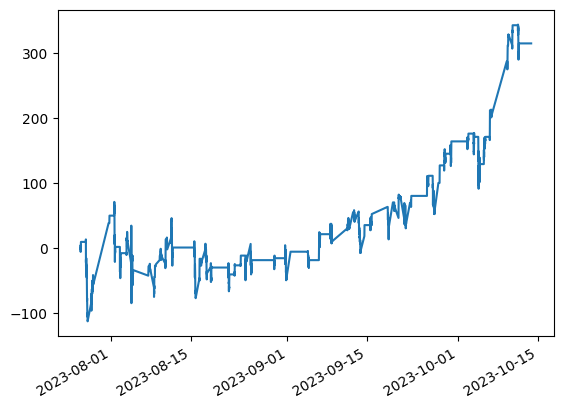

In [47]:
df_trades['ret_cum'].plot()

#**Mensuração de Performance**



*   Drawdown
*   Underwater period
*   Índice Sharpe




#**Drawdown**

O drawdown é a medida do declínio de um pico histórico, apontando a taxa de oscilação entre o preço máximo e o mínimo de uma ação.

In [48]:
initial_capital = 5000

df_trades['ret_cum'] += initial_capital

In [49]:
df_trades['ret_cum']

2023-07-26 13:55:00          NaN
2023-07-26 14:00:00    5000.0000
2023-07-26 14:05:00    5000.0000
2023-07-26 14:10:00    5000.0000
2023-07-26 14:15:00    5000.0000
                         ...    
2023-10-13 20:35:00    5315.5249
2023-10-13 20:40:00    5315.5249
2023-10-13 20:45:00    5315.5249
2023-10-13 20:50:00    5315.5249
2023-10-13 20:55:00    5315.5249
Name: ret_cum, Length: 5000, dtype: float64

In [50]:
df_trades['max_cum'] = df_trades['ret_cum'].cummax()
df_trades['drawdown'] = df_trades['ret_cum'] / df_trades['max_cum'] - 1

df_trades[['max_cum', 'drawdown']]

,max_cum,drawdown
2023-07-26 13:55:00,NaN,NaN
2023-07-26 14:00:00,5000.0000,0.000000
2023-07-26 14:05:00,5000.0000,0.000000
2023-07-26 14:10:00,5000.0000,0.000000
2023-07-26 14:15:00,5000.0000,0.000000
...,...,...
2023-10-13 20:35:00,5344.5249,-0.005426
2023-10-13 20:40:00,5344.5249,-0.005426
2023-10-13 20:45:00,5344.5249,-0.005426
2023-10-13 20:50:00,5344.5249,-0.005426


In [51]:
import matplotlib.pyplot as plt

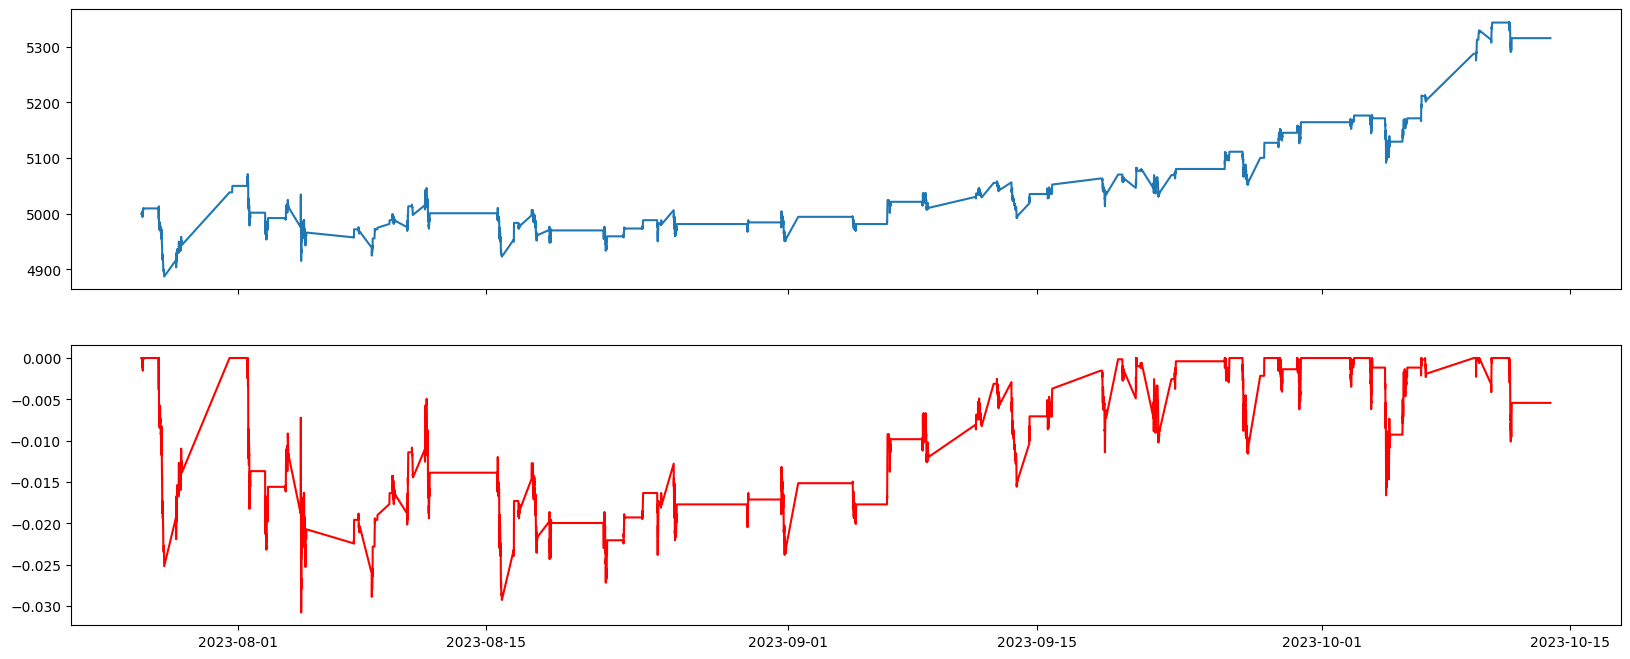

In [52]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(20,8))

ax[0].plot(df_trades['ret_cum'])
ax[1].plot(df_trades['drawdown'], color='red')

#**Underwater period**

O Underwater period permite analise quanto tempo demorou para que a recuperação acontecesse sobre uma perda.

In [53]:
df_trades['underwater'] = df_trades['ret_cum'] < df_trades['max_cum']

In [54]:
df_trades['underwater']

2023-07-26 13:55:00    False
2023-07-26 14:00:00    False
2023-07-26 14:05:00    False
2023-07-26 14:10:00    False
2023-07-26 14:15:00    False
                       ...  
2023-10-13 20:35:00     True
2023-10-13 20:40:00     True
2023-10-13 20:45:00     True
2023-10-13 20:50:00     True
2023-10-13 20:55:00     True
Name: underwater, Length: 5000, dtype: bool

In [55]:
# True = 1
# False = 0
# .sum() nos dará os a quantidade de períodos onde o ret_cum < max_cum = períodos de baixa
df_trades['underwater'].sum()

4507

In [56]:
df_trades['underwater'].sum() * 5 / 60 / 8

46.947916666666664

In [57]:
df_trades

,price,kind,quantity,close,position,ret_market,ret,ret_cum,max_cum,drawdown,underwater
2023-07-26 13:55:00,NaN,NaN,NaN,29.970904,0.0,NaN,NaN,NaN,NaN,NaN,False
2023-07-26 14:00:00,NaN,NaN,NaN,29.845624,0.0,-0.125280,-0.0,5000.0000,5000.0000,0.000000,False
2023-07-26 14:05:00,NaN,NaN,NaN,29.749255,0.0,-0.096369,-0.0,5000.0000,5000.0000,0.000000,False
2023-07-26 14:10:00,NaN,NaN,NaN,29.575790,0.0,-0.173465,-0.0,5000.0000,5000.0000,0.000000,False
2023-07-26 14:15:00,NaN,NaN,NaN,29.633611,0.0,0.057821,0.0,5000.0000,5000.0000,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13 20:35:00,NaN,NaN,NaN,36.230000,0.0,0.000000,0.0,5315.5249,5344.5249,-0.005426,True
2023-10-13 20:40:00,NaN,NaN,NaN,36.240000,0.0,0.010000,0.0,5315.5249,5344.5249,-0.005426,True
2023-10-13 20:45:00,NaN,NaN,NaN,36.250000,0.0,0.010000,0.0,5315.5249,5344.5249,-0.005426,True
2023-10-13 20:50:00,NaN,NaN,NaN,36.230000,0.0,-0.020000,-0.0,5315.5249,5344.5249,-0.005426,True


#**Índice Sharpe**

O Índice de Sharpe é um indicador que avalia o risco e o retorno de um determinado investimento.

In [58]:
df_trades['ret'].groupby(df_trades.index.date).sum().mean() / df_trades['ret'].groupby(df_trades.index.date).sum().std()

0.1407174324771045

#**Otimização de Parâmetros**

In [59]:
from datetime import datetime, timedelta
import pandas as pd

In [60]:
pip install --upgrade --no-cache-dir git+https://github.com/baselsm/tvdatafeed.git

  Cloning https://github.com/baselsm/tvdatafeed.git to /tmp/pip-req-build-nz4fp9_h
  Running command git clone --filter=blob:none --quiet https://github.com/baselsm/tvdatafeed.git /tmp/pip-req-build-nz4fp9_h
  Resolved https://github.com/baselsm/tvdatafeed.git to commit cfc26940b273641116effa1b7c12982191b5a941
  Preparing metadata (setup.py) ... done


In [61]:
from tvDatafeed import TvDatafeed, Interval

In [62]:
tv = TvDatafeed()

In [63]:
df = tv.get_hist(symbol='PETR4',exchange = 'BMFBOVESPA', interval=Interval.in_5_minute,n_bars=5000)

In [64]:
df

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-07-26 13:55:00,BMFBOVESPA:PETR4,30.038363,30.067274,29.951631,29.970904,444640.0
2023-07-26 14:00:00,BMFBOVESPA:PETR4,29.970904,29.999815,29.826350,29.845624,840098.0
2023-07-26 14:05:00,BMFBOVESPA:PETR4,29.835987,29.874535,29.729981,29.749255,1390479.0
2023-07-26 14:10:00,BMFBOVESPA:PETR4,29.749255,29.758892,29.556516,29.575790,1844566.0
2023-07-26 14:15:00,BMFBOVESPA:PETR4,29.566153,29.662522,29.517968,29.633611,715161.0
...,...,...,...,...,...,...
2023-10-13 20:35:00,BMFBOVESPA:PETR4,36.220000,36.240000,36.220000,36.230000,40100.0
2023-10-13 20:40:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.240000,9000.0
2023-10-13 20:45:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.250000,7300.0


In [65]:
periods = 14

close_ret = df['close'] / df['close'].shift(1) - 1

up = close_ret.clip(lower=0)
ma_up = up.rolling(window=periods).mean()

down = -1 * close_ret.clip(upper=0)
ma_down = down.rolling(window=periods).mean()

rs = ma_up / ma_down
df['rsi'] = 100 - (100 / (1 + rs))
df

,symbol,open,high,low,close,volume,rsi
datetime,,,,,,,
2023-07-26 13:55:00,BMFBOVESPA:PETR4,30.038363,30.067274,29.951631,29.970904,444640.0,NaN
2023-07-26 14:00:00,BMFBOVESPA:PETR4,29.970904,29.999815,29.826350,29.845624,840098.0,NaN
2023-07-26 14:05:00,BMFBOVESPA:PETR4,29.835987,29.874535,29.729981,29.749255,1390479.0,NaN
2023-07-26 14:10:00,BMFBOVESPA:PETR4,29.749255,29.758892,29.556516,29.575790,1844566.0,NaN
2023-07-26 14:15:00,BMFBOVESPA:PETR4,29.566153,29.662522,29.517968,29.633611,715161.0,NaN
...,...,...,...,...,...,...,...
2023-10-13 20:35:00,BMFBOVESPA:PETR4,36.220000,36.240000,36.220000,36.230000,40100.0,43.229247
2023-10-13 20:40:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.240000,9000.0,46.555613
2023-10-13 20:45:00,BMFBOVESPA:PETR4,36.230000,36.250000,36.230000,36.250000,7300.0,46.556640


In [66]:
def get_rsi(window):

  close_ret = df['close'] / df['close'].shift(1) - 1

  up = close_ret.clip(lower=0)
  down = -1 * close_ret.clip(upper=0)

  ma_up = up.rolling(window=periods).mean()
  ma_down = down.rolling(window=periods).mean()

  rs = ma_up / ma_down
  rsi = 100 - (100 / (1 + rs))

  return rsi

In [67]:
df_trades_raw = pd.DataFrame(list_trades)
df_trades_raw.set_index('time', inplace=True)

In [68]:
dict_varr = []

for window in [14,21]:
  for up_exit in [50, 60, 70]:
    for down_entry in [20, 30, 40]:
      bet_size = 100
      df['rsi'] = get_rsi(window)

      list_trades = []
      t = 0

      for idx, row in df.iterrows():
        if row['rsi'] <= down_entry and t == 0:
          list_trades += [{'price': row['close'], 'time': idx, 'kind':'buy', 'quantity': bet_size}]
          # Faz a operação de soma de listas e junta tudo atualizando no list_trades
          t = 1

        elif row['rsi'] >= up_exit and t == 1:
          list_trades += [{'price': row['close'], 'time': idx, 'kind':'sell', 'quantity': -bet_size}]
          # Faz a operação de soma de listas e junta tudo atualizando no list_trades
          t = 0

      df_trades_raw = pd.DataFrame(list_trades)
      df_trades_raw.set_index('time', inplace=True)


      df_trades = df_trades_raw.join(df['close'], how='outer')
      df_trades['position'] = df_trades['quantity'].shift(1).fillna(0).cumsum()
      df_trades['ret_market'] = df_trades['close'] - df_trades['close'].shift(1)
      df_trades['ret'] = df_trades['ret_market'] * df_trades['position']
      df_trades['ret_cum'] = df_trades['ret'].cumsum()

      sharpe = df_trades['ret'].groupby(df_trades.index.date).sum().mean() / df_trades['ret'].groupby(df_trades.index.date).sum().std()
      print(f"Window: {window}, up_exit: {up_exit}, down_entry: {down_entry} -> sharpe: {sharpe}")

      dict_varr += [{'window': window, 'up_exit': up_exit, 'down_entry': down_entry,  'sharpe': sharpe}]

Window: 14, up_exit: 50, down_entry: 20 -> sharpe: -0.015526195838278467
Window: 14, up_exit: 50, down_entry: 30 -> sharpe: 0.03409569139357807
Window: 14, up_exit: 50, down_entry: 40 -> sharpe: 0.13055091842788782
Window: 14, up_exit: 60, down_entry: 20 -> sharpe: -0.03410688995489838
Window: 14, up_exit: 60, down_entry: 30 -> sharpe: 0.07949104765944526
Window: 14, up_exit: 60, down_entry: 40 -> sharpe: 0.13192392099653957
Window: 14, up_exit: 70, down_entry: 20 -> sharpe: 0.04935132248397425
Window: 14, up_exit: 70, down_entry: 30 -> sharpe: 0.1407174324771045
Window: 14, up_exit: 70, down_entry: 40 -> sharpe: 0.22488724019140302
Window: 21, up_exit: 50, down_entry: 20 -> sharpe: -0.015526195838278467
Window: 21, up_exit: 50, down_entry: 30 -> sharpe: 0.03409569139357807
Window: 21, up_exit: 50, down_entry: 40 -> sharpe: 0.13055091842788782
Window: 21, up_exit: 60, down_entry: 20 -> sharpe: -0.03410688995489838
Window: 21, up_exit: 60, down_entry: 30 -> sharpe: 0.07949104765944526
W

In [69]:
df_varr = pd.DataFrame(dict_varr)

In [70]:
df_varr

,window,up_exit,down_entry,sharpe
0,14,50,20,-0.015526
1,14,50,30,0.034096
2,14,50,40,0.130551
3,14,60,20,-0.034107
4,14,60,30,0.079491
5,14,60,40,0.131924
6,14,70,20,0.049351
7,14,70,30,0.140717
8,14,70,40,0.224887
9,21,50,20,-0.015526


<Axes: xlabel='down_entry', ylabel='window'>

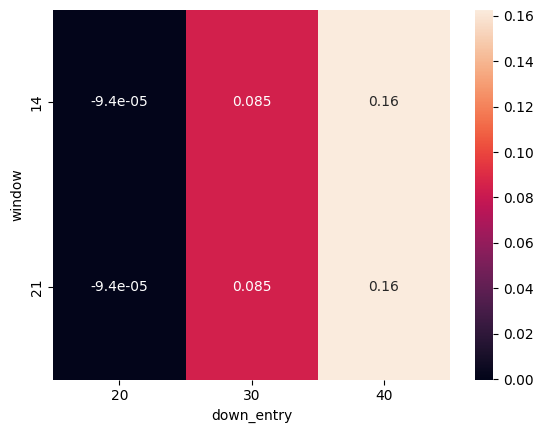

In [71]:
import seaborn as sns
sns.heatmap(df_varr.pivot_table(index="window", columns="down_entry", values="sharpe"), annot=True)